In [1]:
import pandas as pd
import altair as alt

In [41]:
workshop = pd.read_csv('data_input/workshoppoll.csv')
academy = pd.read_csv('data_input/academypoll.csv')
landing = pd.read_csv('data_input/landingpoll.csv')

In [42]:
len(workshop['OS'].unique())

20

In [43]:
workshop.columns


Index(['Number', 'User', 'Date Submitted', 'Country', 'Source URL', 'Device',
       'Browser', 'OS', 'How did you hear about us?',
       'Would you like a response to your question or comment?'],
      dtype='object')

In [44]:
academy.columns


Index(['Number', 'User', 'Date Submitted', 'Country', 'Source URL', 'Device',
       'Browser', 'OS', 'How did you hear about us?',
       'Are you a student or a professional?',
       'Would you like a response to your question or comment?'],
      dtype='object')

In [76]:
academy.shape

(242, 13)

In [77]:
landing.columns

Index(['Number', 'User', 'Date Submitted', 'Country', 'Source URL', 'Device',
       'Browser', 'OS', 'How did you hear about us?'],
      dtype='object')

In [78]:
home = landing.append(workshop.iloc[:,0:8], ignore_index=True)

In [79]:
home.shape

(488, 9)

In [80]:
home.head()

,Browser,Country,Date Submitted,Device,How did you hear about us?,Number,OS,Source URL,User
0,Firefox 57.0,Indonesia,2018-01-05 01:35:47,desktop,Friends / Family - ...,1,Windows 8.1,https://algorit.ma/,00000000
1,Safari 11.0.1,Indonesia,2018-01-05 04:25:43,desktop,Media Publishing,2,Mac OS X 10.13.1,https://algorit.ma/,00000000
2,Chrome 63.0.3239,Indonesia,2018-01-05 16:36:25,desktop,Friends / Family - ...,3,Windows 10,https://algorit.ma/,00000000
3,Chrome 62.0.3202,Indonesia,2018-01-06 16:40:16,desktop,Media Publishing,4,Windows 10,https://algorit.ma/,00000000
4,Chrome 63.0.3239,Indonesia,2018-01-08 03:45:42,desktop,Search Engine,5,Windows 10,https://algorit.ma/,00000000


In [81]:
home['Device'].unique()

array(['desktop', 'tablet', 'phone'], dtype=object)

In [82]:
home.drop('Number', axis=1, inplace=True)

In [83]:
home['How did you hear about us?'].str.split('-').str[1].unique()

array(['                                                     ', nan,
       ' ha ha                                                     ',
       ' tech in asia                                                    ',
       ' Tech in Asia                                                    ',
       ' Machine Learning Workshop\n', ' The Body Shop', ' IDX Channel',
       ' RFI', ' Pak Andy', ' After interview for IDX Channel',
       ' Australia', ' eventbrite', ' varyan', ' From DS', ' T',
       ' algorit.ma', ' workshop', ' koinworks', ' IDEA',
       ' A friend suggested to check out algoritma, which I am doing now.',
       ' Went to seminar from Iykra at Block 71', ' Purwadhika techwave',
       ' Binus University', ' Telegroup Data Science', ' gojek',
       ' hacktiv8', ' azera', ' from a friend', ' Gojek', ' GOJEK',
       ' talkshow internship', ' kalibrr.com', ' go',
       ' Startup Career fair post',
       ' dari orang lewat pake baju algorit.ma', ' gf', ' techinasia',
     

In [84]:
home['How did you hear about us?'].str.split('-').str[0].unique()
academy['How did you hear about us?'].str.split('-').str[0].unique()

array(['Others ', 'Social Media / Online Ads', 'Search Engine',
       'Friends / Family ', nan, 'Media Publishing', 'Email'], dtype=object)

In [85]:
home['Medium'] = home['How did you hear about us?'].str.split('-').str[0]
home['OSGroup'] = home['OS'].str.split(' ').str[0]

In [87]:
academy['Medium'] = academy['How did you hear about us?'].str.split('-').str[0]
academy['OSGroup'] = academy['OS'].str.split(' ').str[0]

In [88]:
home.loc[home['OSGroup'].isin(['Ubuntu', 'Chrome']), 'OSGroup'] = 'Linux'
academy.loc[academy['OSGroup'].isin(['Ubuntu', 'Chrome']), 'OSGroup'] = 'Linux'

In [89]:
home.head()

,Browser,Country,Date Submitted,Device,How did you hear about us?,OS,Source URL,User,Medium,OSGroup
0,Firefox 57.0,Indonesia,2018-01-05 01:35:47,desktop,Friends / Family - ...,Windows 8.1,https://algorit.ma/,00000000,Friends / Family,Windows
1,Safari 11.0.1,Indonesia,2018-01-05 04:25:43,desktop,Media Publishing,Mac OS X 10.13.1,https://algorit.ma/,00000000,Media Publishing,Mac
2,Chrome 63.0.3239,Indonesia,2018-01-05 16:36:25,desktop,Friends / Family - ...,Windows 10,https://algorit.ma/,00000000,Friends / Family,Windows
3,Chrome 62.0.3202,Indonesia,2018-01-06 16:40:16,desktop,Media Publishing,Windows 10,https://algorit.ma/,00000000,Media Publishing,Windows
4,Chrome 63.0.3239,Indonesia,2018-01-08 03:45:42,desktop,Search Engine,Windows 10,https://algorit.ma/,00000000,Search Engine,Windows


In [94]:
academy_com = academy[academy['Are you a student or a professional?'].notnull()]
academy_com = academy_com[academy_com['OSGroup'].notnull()]
academy_com['Are you a student or a professional?'].unique()

array(['Student                                        ',
       'Professional                                        '], dtype=object)

In [117]:
home = home[home['Medium'].notnull()]

In [95]:
academy.head()

,Number,User,Date Submitted,Country,Source URL,Device,Browser,OS,How did you hear about us?,Are you a student or a professional?,Would you like a response to your question or comment?,Medium,OSGroup
0,1.0,00000000,2018-01-05 02:14:14,Indonesia,https://algorit.ma/data-science-academy/,desktop,Chrome 63.0.3239,Windows 10,Others - meetup\n ...,Student,Yes (please enter your email address) - rijal1...,Others,Windows
1,2.0,00000000,2018-01-05 06:55:28,Indonesia,https://algorit.ma/data-science-academy/,desktop,Firefox 58.0,Windows 10,Social Media / Online Ads,Professional ...,No thanks,Social Media / Online Ads,Windows
2,3.0,00000000,2018-01-05 07:26:38,Indonesia,https://algorit.ma/data-science-academy/,desktop,Chrome 61.0.3163,Windows 7,Social Media / Online Ads,Professional ...,Yes (please enter your email address) - ...,Social Media / Online Ads,Windows
3,4.0,00000000,2018-01-05 11:25:02,Indonesia,https://algorit.ma/data-science-academy/,desktop,Chrome 63.0.3239,Windows 10,Social Media / Online Ads,Student,Yes (please enter your email address) - cihuym...,Social Media / Online Ads,Windows
4,5.0,00000000,2018-01-08 04:47:46,Indonesia,https://algorit.ma/data-science-academy/,desktop,Chrome 63.0.3239,Windows 10,Search Engine,Professional ...,Yes (please enter your email address) - slamet...,Search Engine,Windows


In [118]:
home.to_csv('data_processed/home.csv')

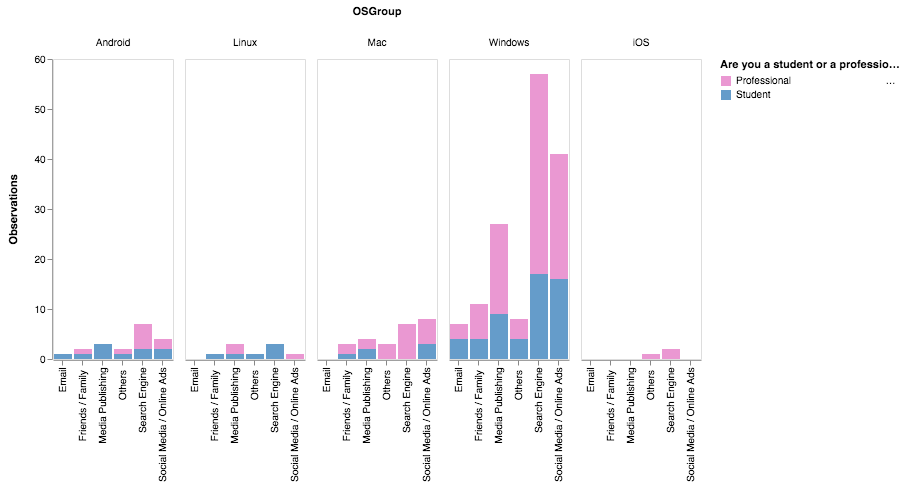

In [116]:
bars = alt.Chart(academy_com).mark_bar().encode(
    # rangeStep allocates 20px for each bar
    alt.X('Medium:N', scale=alt.Scale(rangeStep=20), axis=alt.Axis(title='')),
    alt.Y('count():Q', axis=alt.Axis(title='Observations', grid=False)),
    column='OSGroup:N',
    color=alt.Color('Are you a student or a professional?:N', scale=alt.Scale(range=["#EA98D2", "#659CCA"]))
).configure_axis(
    domainWidth=0.8
)
bars

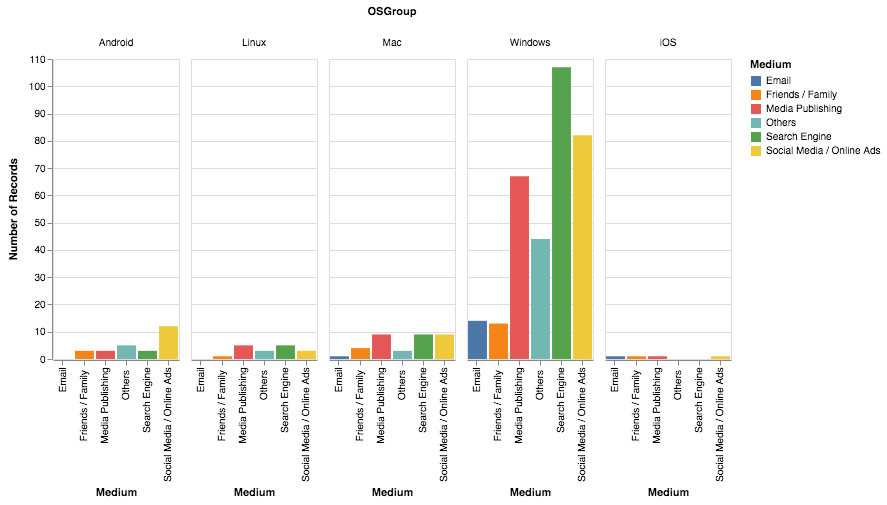

In [119]:
bars = alt.Chart(home).mark_bar().encode(
    x='Medium',
    y='count()',
    column='OSGroup',
    color='Medium'
)

bars

In [132]:
academy_processed = academy.drop(['Number', 'User', 'How did you hear about us?', 'OS', 'Would you like a response to your question or comment?'], axis=1)

In [133]:
academy_processed.head()

,Date Submitted,Country,Source URL,Device,Browser,Are you a student or a professional?,Medium,OSGroup
0,2018-01-05 02:14:14,Indonesia,https://algorit.ma/data-science-academy/,desktop,Chrome 63.0.3239,Student,Others,Windows
1,2018-01-05 06:55:28,Indonesia,https://algorit.ma/data-science-academy/,desktop,Firefox 58.0,Professional ...,Social Media / Online Ads,Windows
2,2018-01-05 07:26:38,Indonesia,https://algorit.ma/data-science-academy/,desktop,Chrome 61.0.3163,Professional ...,Social Media / Online Ads,Windows
3,2018-01-05 11:25:02,Indonesia,https://algorit.ma/data-science-academy/,desktop,Chrome 63.0.3239,Student,Social Media / Online Ads,Windows
4,2018-01-08 04:47:46,Indonesia,https://algorit.ma/data-science-academy/,desktop,Chrome 63.0.3239,Professional ...,Search Engine,Windows


In [134]:
academy_processed.to_csv('data_processed/academy.csv')

## Pandas Subsetting

In [142]:
import numpy as np
df = pd.DataFrame(np.random.rand(5,5), columns=list('abcde'))
df

,a,b,c,d,e
0,0.035674,0.206463,0.717897,0.277831,0.916384
1,0.108261,0.870302,0.509436,0.015082,0.846027
2,0.536389,0.772160,0.011442,0.068460,0.644462
3,0.912336,0.633905,0.842817,0.977861,0.288582
4,0.483896,0.539941,0.837293,0.757094,0.364067


In [148]:
# Select third and fourth row using loc
df.loc[3:4, df.columns]

,a,b,c,d,e
3,0.912336,0.633905,0.842817,0.977861,0.288582
4,0.483896,0.539941,0.837293,0.757094,0.364067


In [146]:
# Select all columns except c using loc
df.loc[3:4, df.columns != 'c']

,a,b,d,e
3,0.912336,0.633905,0.977861,0.288582
4,0.483896,0.539941,0.757094,0.364067


In [155]:
# using drop to drop column d
df.drop('d', axis=1)

,a,b,c,e
0,0.035674,0.206463,0.717897,0.916384
1,0.108261,0.870302,0.509436,0.846027
2,0.536389,0.772160,0.011442,0.644462
3,0.912336,0.633905,0.842817,0.288582
4,0.483896,0.539941,0.837293,0.364067


In [158]:
df.drop(['b', 'd'], axis=1)

,a,c,e
0,0.035674,0.717897,0.916384
1,0.108261,0.509436,0.846027
2,0.536389,0.011442,0.644462
3,0.912336,0.842817,0.288582
4,0.483896,0.837293,0.364067


In [161]:
# first column of data as the index
df = pd.read_csv('data_input/sample_data.csv', index_col=0)
df

,state,color,food,age,height,score
Jane,NY,blue,Steak,30,165,4.6
Niko,TX,green,Lamb,2,70,8.3
Aaron,FL,red,Mango,12,120,9.0
Penelope,AL,white,Apple,4,80,3.3
Dean,AK,gray,Cheese,32,180,1.8
Christina,TX,black,Melon,33,172,9.5
Cornelia,TX,red,Beans,69,150,2.2


In [166]:
print(df.index)
print(df.columns)
print(df.values)

Index(['Jane', 'Niko', 'Aaron', 'Penelope', 'Dean', 'Christina', 'Cornelia'], dtype='object')
Index(['state', 'color', 'food', 'age', 'height', 'score'], dtype='object')
[['NY' 'blue' 'Steak' 30 165 4.6]
 ['TX' 'green' 'Lamb' 2 70 8.3]
 ['FL' 'red' 'Mango' 12 120 9.0]
 ['AL' 'white' 'Apple' 4 80 3.3]
 ['AK' 'gray' 'Cheese' 32 180 1.8]
 ['TX' 'black' 'Melon' 33 172 9.5]
 ['TX' 'red' 'Beans' 69 150 2.2]]


In [168]:
print(type(df.index))
print(type(df.columns))
print(type(df.values))

<class 'pandas.core.indexes.base.Index'>
<class 'pandas.core.indexes.base.Index'>
<class 'numpy.ndarray'>


In [172]:
# selecting a single column of DataFrame returns a Series
print(type(df['food']))
print(df['food'])

<class 'pandas.core.series.Series'>
Jane          Steak
Niko           Lamb
Aaron         Mango
Penelope      Apple
Dean         Cheese
Christina     Melon
Cornelia      Beans
Name: food, dtype: object


In [174]:
subset1 = df[['food', 'color', 'score']]
print(type(subset1))
print(subset1)

<class 'pandas.core.frame.DataFrame'>
             food  color  score
Jane        Steak   blue    4.6
Niko         Lamb  green    8.3
Aaron       Mango    red    9.0
Penelope    Apple  white    3.3
Dean       Cheese   gray    1.8
Christina   Melon  black    9.5
Cornelia    Beans    red    2.2


In [175]:
subset2 = df[['food']]
print(type(subset2))
print(subset2)

<class 'pandas.core.frame.DataFrame'>
             food
Jane        Steak
Niko         Lamb
Aaron       Mango
Penelope    Apple
Dean       Cheese
Christina   Melon
Cornelia    Beans


In [176]:
subset3 = df.loc['Niko']
print(type(subset3))
print(subset3)

<class 'pandas.core.series.Series'>
state        TX
color     green
food       Lamb
age           2
height       70
score       8.3
Name: Niko, dtype: object


In [177]:
subset4 = df.loc[['Niko', 'Dean']]
print(type(subset4))
print(subset4)

<class 'pandas.core.frame.DataFrame'>
     state  color    food  age  height  score
Niko    TX  green    Lamb    2      70    8.3
Dean    AK   gray  Cheese   32     180    1.8


In [184]:
# slice notation (start:stop:step)
print(df.loc['Aaron':'Cornelia'])
print(df.loc['Aaron':'Cornelia':2])

          state  color    food  age  height  score
Aaron        FL    red   Mango   12     120    9.0
Penelope     AL  white   Apple    4      80    3.3
Dean         AK   gray  Cheese   32     180    1.8
Christina    TX  black   Melon   33     172    9.5
Cornelia     TX    red   Beans   69     150    2.2
         state color    food  age  height  score
Aaron       FL   red   Mango   12     120    9.0
Dean        AK  gray  Cheese   32     180    1.8
Cornelia    TX   red   Beans   69     150    2.2


In [186]:
df.loc[:'Aaron']

,state,color,food,age,height,score
Jane,NY,blue,Steak,30,165,4.6
Niko,TX,green,Lamb,2,70,8.3
Aaron,FL,red,Mango,12,120,9.0


In [197]:
# Using .loc[row, column] simultaneously
df.loc['Dean':'Cornelia', ['age','state','score']]

,age,state,score
Dean,32,AK,1.8
Christina,33,TX,9.5
Cornelia,69,TX,2.2


In [200]:
df.loc[:'Aaron', 'color':]

,color,food,age,height,score
Jane,blue,Steak,30,165,4.6
Niko,green,Lamb,2,70,8.3
Aaron,red,Mango,12,120,9.0


In [202]:
df.loc[:,'color':]

,color,food,age,height,score
Jane,blue,Steak,30,165,4.6
Niko,green,Lamb,2,70,8.3
Aaron,red,Mango,12,120,9.0
Penelope,white,Apple,4,80,3.3
Dean,gray,Cheese,32,180,1.8
Christina,black,Melon,33,172,9.5
Cornelia,red,Beans,69,150,2.2


In [204]:
print(df.loc[['Penelope', 'Dean'], :])
print(df.loc[['Penelope', 'Dean']])

         state  color    food  age  height  score
Penelope    AL  white   Apple    4      80    3.3
Dean        AK   gray  Cheese   32     180    1.8
         state  color    food  age  height  score
Penelope    AL  white   Apple    4      80    3.3
Dean        AK   gray  Cheese   32     180    1.8


In [209]:
print(df.iloc[1])
# print(df.loc['Niko'])

state        TX
color     green
food       Lamb
age           2
height       70
score       8.3
Name: Niko, dtype: object


In [211]:
print(df.iloc[[1,3,6]])

         state  color   food  age  height  score
Niko        TX  green   Lamb    2      70    8.3
Penelope    AL  white  Apple    4      80    3.3
Cornelia    TX    red  Beans   69     150    2.2


In [212]:
df.iloc[4:]

,state,color,food,age,height,score
Penelope,AL,white,Apple,4,80,3.3
Dean,AK,gray,Cheese,32,180,1.8
Christina,TX,black,Melon,33,172,9.5
Cornelia,TX,red,Beans,69,150,2.2


In [213]:
# select 3rd position to end, step by 2
df.iloc[3::2]

,state,color,food,age,height,score
Penelope,AL,white,Apple,4,80,3.3
Christina,TX,black,Melon,33,172,9.5


In [215]:
df.iloc[:4, [1,2,5]]

,color,food,score
Jane,blue,Steak,4.6
Niko,green,Lamb,8.3
Aaron,red,Mango,9.0
Penelope,white,Apple,3.3


In [223]:
df.loc['Niko':'Cornelia']
# better than: df['Niko':'Cornelia']
# better than: df[1:]

,state,color,food,age,height,score
Niko,TX,green,Lamb,2,70,8.3
Aaron,FL,red,Mango,12,120,9.0
Penelope,AL,white,Apple,4,80,3.3
Dean,AK,gray,Cheese,32,180,1.8
Christina,TX,black,Melon,33,172,9.5
Cornelia,TX,red,Beans,69,150,2.2


In [224]:
# series selection
food = df['food']
food.loc['Dean']

'Cheese'

In [225]:
food

Jane          Steak
Niko           Lamb
Aaron         Mango
Penelope      Apple
Dean         Cheese
Christina     Melon
Cornelia      Beans
Name: food, dtype: object

In [228]:
print(type(df.height))
df.height

<class 'pandas.core.series.Series'>


Jane         165
Niko          70
Aaron        120
Penelope      80
Dean         180
Christina    172
Cornelia     150
Name: height, dtype: int64

In [230]:
df.loc['Dean':'Cornelia'].height

Dean         180
Christina    172
Cornelia     150
Name: height, dtype: int64